###### TODO:

1.  Take MBDNL as the reference to quantify the error ( user relative error )

2.  Check for Cu and Alkaline Earth metals

3.  Find formal charges by beggar's analysis in MBDNL optimised geometry

4.  Consider absolute electronegetiy of each elements present also as a fetaure function ( for the mettalic things )

5.  Polarisibility 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
copper = pd.read_csv('Cu.csv')
copper_mbd = pd.read_csv('Cu_mbdnl.csv')

In [3]:
copper_mbd.head()

,cell_length,energy,E-dispersion
0,NaN,NaN,NaN
1,2.777431,14.479846,-3.56830
2,2.977431,-3.002095,-3.18611
3,3.177431,-11.667733,-2.84942
4,3.377431,-15.462080,-2.55013


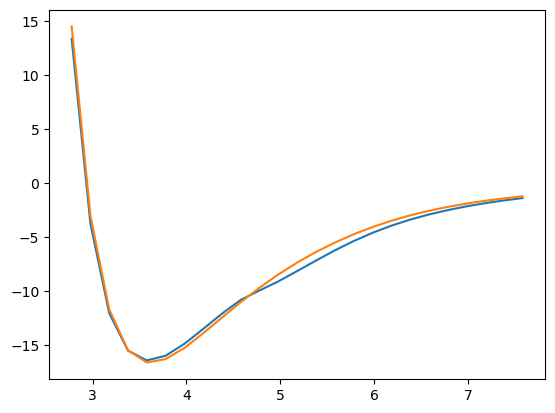

In [4]:
# plt.plot(cuppor['cell_length'], cuppor['energy'], 'o')
plt.plot(copper['cell_length'], copper['energy'])

# plt.plot(copper_mbd['cell_length'], copper_mbd['energy'], 'o')
plt.plot(copper_mbd['cell_length'], copper_mbd['energy'])

plt.show()

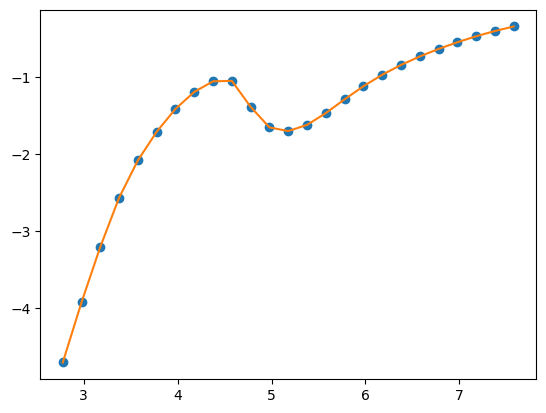

In [8]:
plt.plot(copper['cell_length'], copper['E-dispersion'], 'o')
plt.plot(copper['cell_length'], copper['E-dispersion'])
plt.show()

In [15]:
import itertools
import numpy as np

def generate_combinations(params, param_names, operators):
    results = []

    # Generate all subsets of parameters (combinations)
    for r in range(1, len(params) + 1):
        for subset_indices in itertools.permutations(range(len(params)), r):  # Permutations of parameter indices
            subset = [params[i] for i in subset_indices]
            subset_names = [param_names[i] for i in subset_indices]

            # Place operators between parameters
            if len(subset) == 1:
                expr_str = subset_names[0]
                expr_val = subset[0]
                results.append((expr_str, expr_val))
            else:
                for ops in itertools.product(operators, repeat=len(subset) - 1):
                    # Construct the expression as a string
                    expr_str = subset_names[0]
                    expr_val = subset[0]

                    for i in range(len(ops)):
                        expr_str += f" {ops[i]} {subset_names[i + 1]}"
                        if ops[i] == '*':
                            expr_val = expr_val * subset[i + 1]
                        elif ops[i] == '/':
                            expr_val = expr_val / subset[i + 1]
                        elif ops[i] == '+':
                            expr_val = expr_val + subset[i + 1]
                        elif ops[i] == '-':
                            expr_val = expr_val - subset[i + 1]

                    results.append((expr_str, expr_val))

    return results

# Define parameters as numpy arrays
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = np.array([9, 10, 11, 12])
d = np.array([13, 14, 15, 16])
parameters = [a, b, c, d]
param_names = ['a', 'b', 'c', 'd']

# Define mathematical operators
operators = ['*', '/', '+', '-']

# Generate and evaluate all expressions
all_expressions = generate_combinations(parameters, param_names, operators)

# Print results

for expr_str, expr_val in all_expressions:
    print(f"{expr_str} = {expr_val}")


a = [1 2 3 4]
b = [5 6 7 8]
c = [ 9 10 11 12]
d = [13 14 15 16]
a * b = [ 5 12 21 32]
a / b = [0.2        0.33333333 0.42857143 0.5       ]
a + b = [ 6  8 10 12]
a - b = [-4 -4 -4 -4]
a * c = [ 9 20 33 48]
a / c = [0.11111111 0.2        0.27272727 0.33333333]
a + c = [10 12 14 16]
a - c = [-8 -8 -8 -8]
a * d = [13 28 45 64]
a / d = [0.07692308 0.14285714 0.2        0.25      ]
a + d = [14 16 18 20]
a - d = [-12 -12 -12 -12]
b * a = [ 5 12 21 32]
b / a = [5.         3.         2.33333333 2.        ]
b + a = [ 6  8 10 12]
b - a = [4 4 4 4]
b * c = [45 60 77 96]
b / c = [0.55555556 0.6        0.63636364 0.66666667]
b + c = [14 16 18 20]
b - c = [-4 -4 -4 -4]
b * d = [ 65  84 105 128]
b / d = [0.38461538 0.42857143 0.46666667 0.5       ]
b + d = [18 20 22 24]
b - d = [-8 -8 -8 -8]
c * a = [ 9 20 33 48]
c / a = [9.         5.         3.66666667 3.        ]
c + a = [10 12 14 16]
c - a = [8 8 8 8]
c * b = [45 60 77 96]
c / b = [1.8        1.66666667 1.57142857 1.5       ]
c + b = [14 16 18 20

In [ ]:
values = pd.DataFrame()

for expr_str , expr_val in all_expressions:
    values[expr_str] = expr_val




/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/2615463648.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  values[expr_str] = expr_val
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/2615463648.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  values[expr_str] = expr_val
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/2615463648.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

   a  b   c   d  a * b     a / b  a + b  a - b  a * c     a / c  ...  \
0  1  5   9  13      5  0.200000      6     -4      9  0.111111  ...   
1  2  6  10  14     12  0.333333      8     -4     20  0.200000  ...   
2  3  7  11  15     21  0.428571     10     -4     33  0.272727  ...   
3  4  8  12  16     32  0.500000     12     -4     48  0.333333  ...   

   d - c / b + a  d - c / b - a  d - c + b * a  d - c + b / a  d - c + b + a  \
0       1.800000      -0.200000              9       9.000000             10   
1       2.666667      -1.333333             20       5.000000             12   
2       3.571429      -2.428571             33       3.666667             14   
3       4.500000      -3.500000             48       3.000000             16   

   d - c + b - a  d - c - b * a  d - c - b / a  d - c - b + a  d - c - b - a  
0              8             -1           -1.0              0             -2  
1              8             -4           -1.0              0             -4  
2

/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/2615463648.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  values[expr_str] = expr_val
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/2615463648.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  values[expr_str] = expr_val
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_80311/2615463648.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [33]:
values.head()

correlation = values.corr()

correlation = correlation[correlation['a'] == 1]
correlation.tail()

,a,b,c,d,a * b,a / b,a + b,a - b,a * c,a / c,...,d - c / b + a,d - c / b - a,d - c + b * a,d - c + b / a,d - c + b + a,d - c + b - a,d - c - b * a,d - c - b / a,d - c - b + a,d - c - b - a
d + c + b - a,1.0,1.0,1.0,1.0,0.995098,0.990366,1.0,NaN,0.997642,0.996347,...,0.999881,-0.99992,0.997642,-0.928743,1.0,NaN,-0.984374,NaN,NaN,-1.0
d + c - b + a,1.0,1.0,1.0,1.0,0.995098,0.990366,1.0,NaN,0.997642,0.996347,...,0.999881,-0.99992,0.997642,-0.928743,1.0,NaN,-0.984374,NaN,NaN,-1.0
d - c * b + a,1.0,1.0,1.0,1.0,0.995098,0.990366,1.0,NaN,0.997642,0.996347,...,0.999881,-0.99992,0.997642,-0.928743,1.0,NaN,-0.984374,NaN,NaN,-1.0
d - c * b - a,1.0,1.0,1.0,1.0,0.995098,0.990366,1.0,NaN,0.997642,0.996347,...,0.999881,-0.99992,0.997642,-0.928743,1.0,NaN,-0.984374,NaN,NaN,-1.0
d - c + b + a,1.0,1.0,1.0,1.0,0.995098,0.990366,1.0,NaN,0.997642,0.996347,...,0.999881,-0.99992,0.997642,-0.928743,1.0,NaN,-0.984374,NaN,NaN,-1.0
